In [2]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
notas = pd.read_csv('Dados\dados_aps5.csv', sep=';')
notas = notas.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])
notas = notas.drop([14, 15, 16])

notas

,Nome,Acertos,Erros
0,Ana H,6.0,7.0
1,André,13.0,0.0
2,Daniel,13.0,0.0
3,Gustavo,13.0,0.0
4,Esther,5.0,8.0
5,Rafaela,9.0,4.0
6,Henrique J,1.0,12.0
7,Eduardo,10.0,3.0
8,Giulia,11.0,2.0
9,Julia,5.0,8.0


In [4]:
# Parâmetros
media_acertos_amostral = notas['Acertos'].mean()
desvio_padrao_acertos_amostral = notas['Acertos'].std()

# Probabilidade de cada pessoa acertar
prob_acertos = {}
qtd_pessoas = len(notas)

for i in range(qtd_pessoas):
    linha = notas.iloc[i]
    pessoa = linha['Nome']
    acertos = linha['Acertos']
    prob = acertos / qtd_pessoas
    prob_acertos[pessoa] = prob

media_probs = sum(prob_acertos.values()) / qtd_pessoas
desvio_probs = np.std(list(prob_acertos.values()), ddof=1)

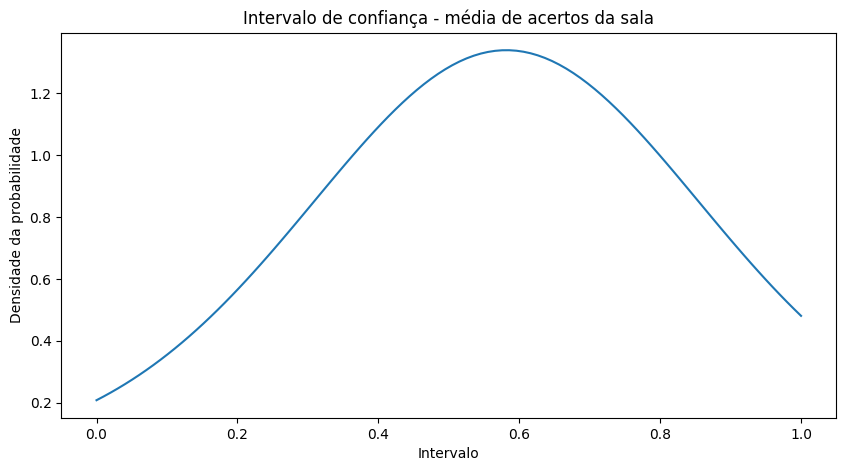

In [7]:
# T-test - probs
a_p = st.t.ppf(0.025, qtd_pessoas - 1, loc=media_probs, scale=desvio_probs)
b_p = st.t.ppf(1 - 0.025, qtd_pessoas - 1, loc=media_probs, scale=desvio_probs)

# Intervalo de confiança - probs
intervalo_confianca = [a_p, b_p]

# T-test - acertos
a = st.t.ppf(0.025, qtd_pessoas - 1, loc=media_acertos_amostral, scale=desvio_padrao_acertos_amostral)
b = st.t.ppf(1 - 0.025, qtd_pessoas - 1, loc=media_acertos_amostral, scale=desvio_padrao_acertos_amostral)

# Intervalo de confiança - acertos
intervalo_confianca_acertos = [a, b]

# Plot
plt.figure(figsize=(10, 5))
plt.title('Intervalo de confiança - média de acertos da sala')
plt.xlabel('Intervalo')
plt.ylabel('Densidade da probabilidade')

x = np.linspace(0,1,100)
y = st.t.pdf(x, loc=media_probs, scale=desvio_probs, df=qtd_pessoas - 1)
             
plt.plot(x, y)
